# Code Example 28

From [Advanced Data Analysis from an Elementary Point of View](http://www.stat.cmu.edu/~cshalizi/ADAfaEPoV/ADAfaEPoV.pdf), section 11.2 (in the version of Friday 6th November, 2015) by [Cosma Rohilla Shalizi](http://www.stat.cmu.edu/~cshalizi/).

In [19]:
using Distributions
using Gadfly
using Plots

gadfly();

In [20]:
function σ(α)
    1 ./ (1 .+ exp(-α))
end;

X - Matrix of observations: rows = observations; cols = predictors

In [29]:
function sim_logistic{T <: Real, U <: Real}(X::AbstractMatrix{T}, β₀::Real, β::AbstractVector{U})
    logistic = σ(β₀ .+ (X * β))

    N = length(logistic)

    Y = Array{Int}(N)

    for i in 1:N
        Y[i] = rand(Bernoulli(logistic[i]))
    end

    return Y
end;

In [30]:
function plot_logistic_sim{T <: Real, U <: Real}(X::AbstractMatrix{T}, β₀::Real, β::AbstractVector{U})
    Y = sim_logistic(X, β₀, β)

    plt = scatter(
        x = X[:, 1], y = X[:, 2],
        group = Y, markercolor = [colorant"LightSkyBlue" colorant"Red"],
        markersize = 4,
        title = "β₀ = $β₀, β = $β" )

    plot!( plt,
        linspace(-1, 1), linspace(-1, 1),
        (x, y) -> σ(β₀ + dot([x, y], β)),
        nlevels = 10, legend = false )
end;

In [31]:
X = rand(Uniform(-1, 1), (50, 2));

[Plots.jl] Initializing backend: gadfly

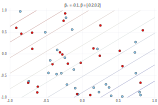

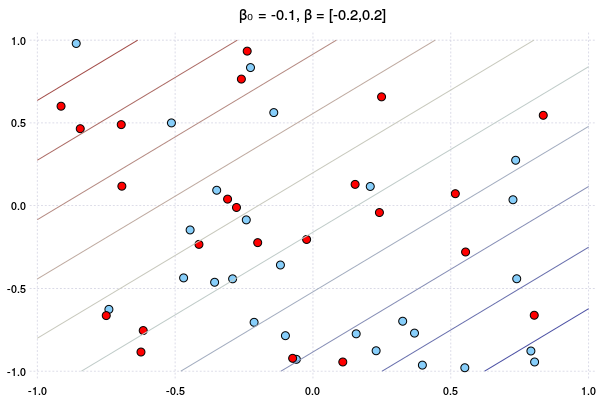

In [32]:
plot_logistic_sim(X, -0.1, [-0.2, 0.2])

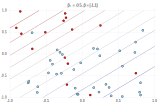

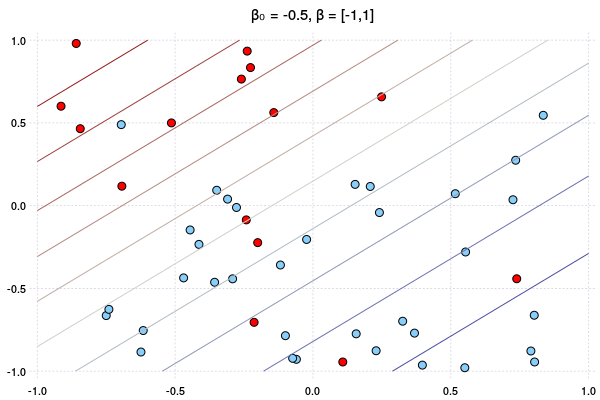

In [33]:
plot_logistic_sim(X, -0.5, [-1, 1])

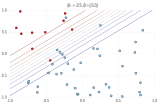

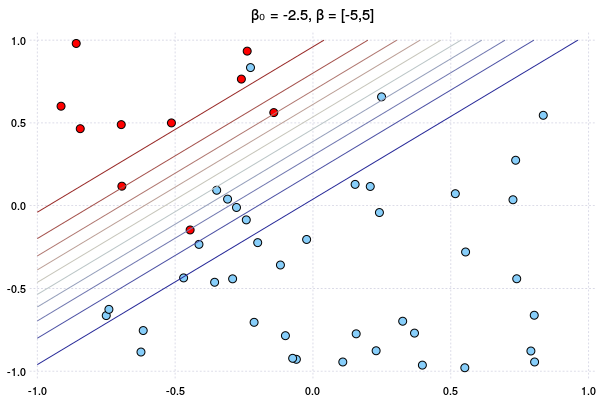

In [34]:
plot_logistic_sim(X, -2.5, [-5, 5])

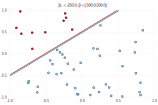

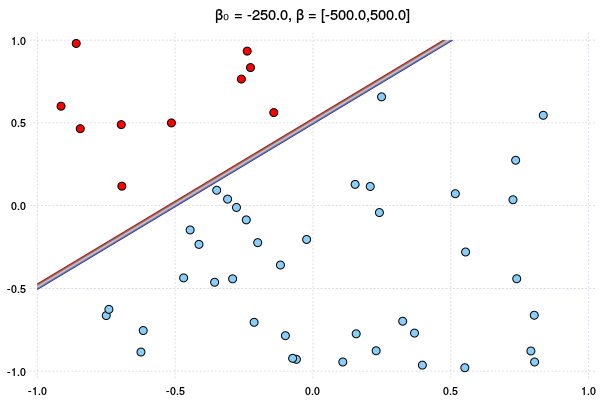

In [35]:
plot_logistic_sim(X, -2.5e2, [-5e2, 5e2])